# Projeto de Regressão: Bike Sharing Demand

**Aluno:** Pedro Civita
**Disciplina:** Redes Neurais e Deep Learning
**Dataset:** Bike Sharing (UCI ML Repository)

## Objetivo

Implementar um Multi-Layer Perceptron (MLP) para prever a demanda de bicicletas compartilhadas com base em condições climáticas e temporais.

## 1. Seleção do Dataset

### Dataset: Bike Sharing Demand

**Fonte:** [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

**Características:**
- **Amostras:** 17,379 registros (horários de 2011-2012)
- **Features:** 16 variáveis (clima, tempo, sazonalidade)
- **Target:** `cnt` - contagem total de aluguéis (regressão)

**Motivação:**
- Problema real de otimização urbana
- Dataset não-trivial com padrões temporais complexos
- Evita datasets clássicos (Boston/California Housing)
- Disponível em competição Kaggle (possibilidade de bonus)

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuração
np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Setup completo!")

Setup completo!


In [2]:
# Carregar dataset
df = pd.read_csv('hour.csv')

print(f"Shape: {df.shape}")
print(f"\nPrimeiras linhas:")
df.head()

Shape: (17379, 17)

Primeiras linhas:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Informações do dataset
print("Informações Gerais:")
print("="*70)
df.info()

print("\n" + "="*70)
print("Estatísticas Descritivas:")
print("="*70)
df.describe()

Informações Gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Estatísticas Descritivas:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## 2. Análise Exploratória

Análise inicial para entender padrões e relações nos dados.

In [4]:
# Verificar valores ausentes
print("Valores Ausentes:")
print(df.isnull().sum())

# Análise da variável target
print(f"\nTarget (cnt) - Estatísticas:")
print(f"  Média: {df['cnt'].mean():.2f}")
print(f"  Mediana: {df['cnt'].median():.2f}")
print(f"  Desvio padrão: {df['cnt'].std():.2f}")
print(f"  Min: {df['cnt'].min()}")
print(f"  Max: {df['cnt'].max()}")

Valores Ausentes:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Target (cnt) - Estatísticas:
  Média: 189.46
  Mediana: 142.00
  Desvio padrão: 181.39
  Min: 1
  Max: 977


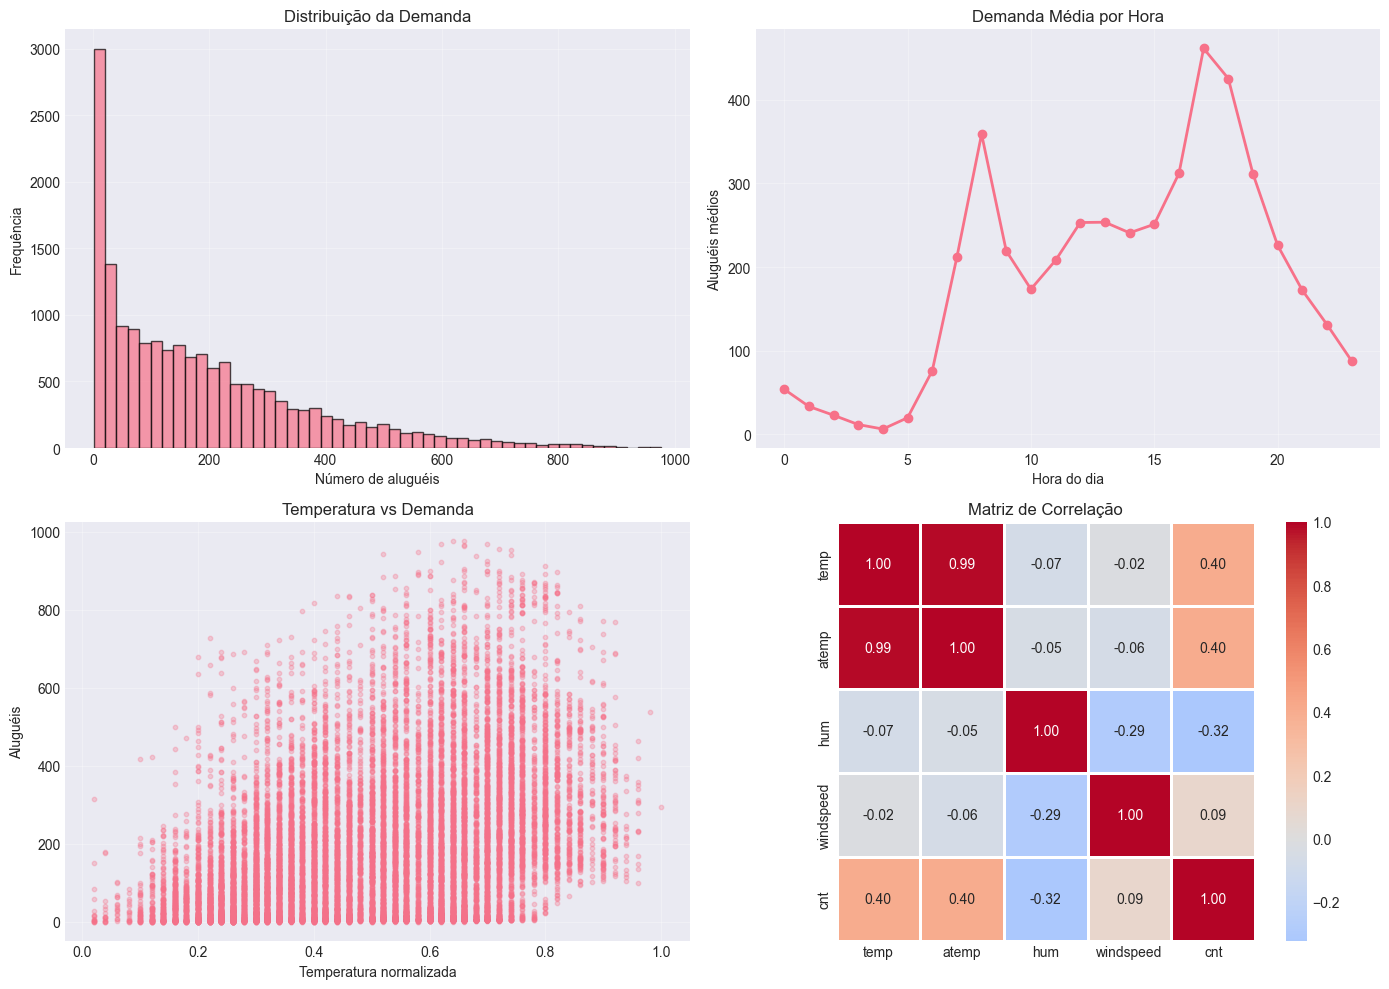

In [5]:
# Visualizações exploratórias
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribuição do target
axes[0,0].hist(df['cnt'], bins=50, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribuição da Demanda')
axes[0,0].set_xlabel('Número de aluguéis')
axes[0,0].set_ylabel('Frequência')
axes[0,0].grid(True, alpha=0.3)

# Demanda por hora
hourly = df.groupby('hr')['cnt'].mean()
axes[0,1].plot(hourly.index, hourly.values, marker='o', linewidth=2)
axes[0,1].set_title('Demanda Média por Hora')
axes[0,1].set_xlabel('Hora do dia')
axes[0,1].set_ylabel('Aluguéis médios')
axes[0,1].grid(True, alpha=0.3)

# Temperatura vs Demanda
axes[1,0].scatter(df['temp'], df['cnt'], alpha=0.3, s=10)
axes[1,0].set_title('Temperatura vs Demanda')
axes[1,0].set_xlabel('Temperatura normalizada')
axes[1,0].set_ylabel('Aluguéis')
axes[1,0].grid(True, alpha=0.3)

# Correlação
corr_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
corr = df[corr_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            ax=axes[1,1], square=True, linewidths=1)
axes[1,1].set_title('Matriz de Correlação')

plt.tight_layout()
plt.show()

## 3. Limpeza e Normalização dos Dados

### Estratégia de Pré-processamento:

1. **Remoção de features:** `instant`, `dteday`, `casual`, `registered` (evitar data leakage)
2. **Feature engineering:** Transformação cíclica para variáveis temporais (sin/cos)
3. **Normalização:** Z-score standardization (média=0, std=1)

In [6]:
# Preparar dados
df_prep = df.copy()

# Remover colunas
drop_cols = ['instant', 'dteday', 'casual', 'registered']
df_prep = df_prep.drop(columns=drop_cols)

print(f"Colunas removidas: {drop_cols}")
print(f"Shape após remoção: {df_prep.shape}")

Colunas removidas: ['instant', 'dteday', 'casual', 'registered']
Shape após remoção: (17379, 13)


In [7]:
# Feature engineering: variáveis cíclicas
# Hora, mês e dia da semana são cíclicos (ex: hora 23 próxima de hora 0)
def encode_cyclical(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
    return data

df_prep = encode_cyclical(df_prep, 'hr', 24)
df_prep = encode_cyclical(df_prep, 'mnth', 12)
df_prep = encode_cyclical(df_prep, 'weekday', 7)

# Remover originais
df_prep = df_prep.drop(columns=['hr', 'mnth', 'weekday'])

print(f"Features cíclicas criadas!")
print(f"Shape final: {df_prep.shape}")
print(f"\nFeatures: {list(df_prep.columns)}")

Features cíclicas criadas!
Shape final: (17379, 16)

Features: ['season', 'yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'hr_sin', 'hr_cos', 'mnth_sin', 'mnth_cos', 'weekday_sin', 'weekday_cos']


In [8]:
# Separar X e y
X = df_prep.drop(columns=['cnt']).values
y = df_prep['cnt'].values.reshape(-1, 1)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Salvar estatísticas para desnormalização posterior
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
y_mean = y.mean()
y_std = y.std()

# Normalizar (z-score)
X_norm = (X - X_mean) / (X_std + 1e-8)
y_norm = (y - y_mean) / y_std

print(f"\nApós normalização:")
print(f"X: média={X_norm.mean():.3f}, std={X_norm.std():.3f}")
print(f"y: média={y_norm.mean():.3f}, std={y_norm.std():.3f}")

X shape: (17379, 15)
y shape: (17379, 1)

Após normalização:
X: média=0.000, std=1.000
y: média=-0.000, std=1.000


## 4. Estratégia de Divisão Train/Validation/Test

**Divisão:** 70% treino / 15% validação / 15% teste

**Modo de treinamento:** Mini-batch gradient descent (batch_size=64)

**Justificativa:**
- 70% treino: volume suficiente para aprendizado
- 15% validação: monitorar overfitting e early stopping
- 15% teste: avaliação final imparcial
- Mini-batch: equilíbrio entre velocidade e estabilidade

In [9]:
# Dividir dados
n_samples = X_norm.shape[0]
indices = np.arange(n_samples)
np.random.shuffle(indices)

# Calcular tamanhos
train_size = int(0.70 * n_samples)
val_size = int(0.15 * n_samples)
test_size = n_samples - train_size - val_size

# Dividir índices
train_idx = indices[:train_size]
val_idx = indices[train_size:train_size + val_size]
test_idx = indices[train_size + val_size:]

# Criar conjuntos
X_train, y_train = X_norm[train_idx], y_norm[train_idx]
X_val, y_val = X_norm[val_idx], y_norm[val_idx]
X_test, y_test = X_norm[test_idx], y_norm[test_idx]

print(f"Divisão dos dados:")
print(f"  Train: {len(X_train):,} ({len(X_train)/n_samples*100:.1f}%)")
print(f"  Val:   {len(X_val):,} ({len(X_val)/n_samples*100:.1f}%)")
print(f"  Test:  {len(X_test):,} ({len(X_test)/n_samples*100:.1f}%)")

Divisão dos dados:
  Train: 12,165 (70.0%)
  Val:   2,606 (15.0%)
  Test:  2,608 (15.0%)


## 5. Implementação do MLP

**Arquitetura:** Input(15) → Hidden(64, ReLU) → Hidden(32, ReLU) → Hidden(16, ReLU) → Output(1, Linear)

**Componentes:**
- **Inicialização:** He initialization
- **Ativação:** ReLU (camadas ocultas), Linear (saída)
- **Loss:** MSE + Regularização L2
- **Otimização:** Mini-batch gradient descent
- **Regularização:** Early stopping + L2

In [10]:
class MLP:
    """Multi-Layer Perceptron para Regressão"""

    def __init__(self, layers, learning_rate=0.001, reg_lambda=0.001):
        self.lr = learning_rate
        self.reg = reg_lambda
        self.weights = []
        self.biases = []

        # He initialization
        for i in range(len(layers) - 1):
            W = np.random.randn(layers[i], layers[i+1]) * np.sqrt(2.0 / layers[i])
            b = np.zeros((1, layers[i+1]))
            self.weights.append(W)
            self.biases.append(b)

        self.train_losses = []
        self.val_losses = []

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def forward(self, X):
        """Forward propagation"""
        self.cache = {'A': [X], 'Z': []}
        A = X

        # Hidden layers
        for i in range(len(self.weights) - 1):
            Z = A @ self.weights[i] + self.biases[i]
            A = self.relu(Z)
            self.cache['Z'].append(Z)
            self.cache['A'].append(A)

        # Output layer (linear)
        Z = A @ self.weights[-1] + self.biases[-1]
        self.cache['Z'].append(Z)
        self.cache['A'].append(Z)

        return Z

    def compute_loss(self, y_true, y_pred):
        """MSE + L2 regularization"""
        n = len(y_true)
        mse = np.mean((y_pred - y_true) ** 2)
        l2 = sum(np.sum(W ** 2) for W in self.weights)
        return mse + (self.reg / (2 * n)) * l2

    def backward(self, y_true):
        """Backpropagation"""
        n = len(y_true)
        y_pred = self.cache['A'][-1]
        dA = (2.0 / n) * (y_pred - y_true)

        grads_W = []
        grads_b = []

        for i in reversed(range(len(self.weights))):
            A_prev = self.cache['A'][i]

            dW = A_prev.T @ dA + (self.reg / n) * self.weights[i]
            db = np.sum(dA, axis=0, keepdims=True)

            grads_W.insert(0, dW)
            grads_b.insert(0, db)

            if i > 0:
                dA = (dA @ self.weights[i].T) * self.relu_derivative(self.cache['Z'][i-1])

        # Update weights
        for i in range(len(self.weights)):
            self.weights[i] -= self.lr * grads_W[i]
            self.biases[i] -= self.lr * grads_b[i]

    def fit(self, X_train, y_train, X_val, y_val, epochs=200, batch_size=64, patience=15, verbose=True):
        """Treinar modelo com early stopping"""
        best_loss = float('inf')
        patience_count = 0

        for epoch in range(epochs):
            # Mini-batch training
            indices = np.arange(len(X_train))
            np.random.shuffle(indices)

            for start in range(0, len(X_train), batch_size):
                end = min(start + batch_size, len(X_train))
                batch_idx = indices[start:end]

                X_batch = X_train[batch_idx]
                y_batch = y_train[batch_idx]

                self.forward(X_batch)
                self.backward(y_batch)

            # Calcular losses
            train_pred = self.forward(X_train)
            val_pred = self.forward(X_val)

            train_loss = self.compute_loss(y_train, train_pred)
            val_loss = self.compute_loss(y_val, val_pred)

            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)

            # Early stopping
            if val_loss < best_loss:
                best_loss = val_loss
                patience_count = 0
                self.best_weights = [W.copy() for W in self.weights]
                self.best_biases = [b.copy() for b in self.biases]
            else:
                patience_count += 1

            if verbose and (epoch + 1) % 20 == 0:
                print(f"Época {epoch+1:3d}/{epochs} | Train: {train_loss:.4f} | Val: {val_loss:.4f}")

            if patience_count >= patience:
                if verbose:
                    print(f"\nEarly stopping! Melhor val loss: {best_loss:.4f}")
                break

        # Restaurar melhores pesos
        self.weights = self.best_weights
        self.biases = self.best_biases

    def predict(self, X):
        """Fazer predições"""
        A = X
        for i in range(len(self.weights) - 1):
            A = self.relu(A @ self.weights[i] + self.biases[i])
        return A @ self.weights[-1] + self.biases[-1]

print("MLP implementado!")

MLP implementado!


## 6. Treinamento do Modelo

In [11]:
# Criar e treinar modelo
model = MLP(
    layers=[15, 64, 32, 16, 1],
    learning_rate=0.001,
    reg_lambda=0.001
)

print("Iniciando treinamento...\n")
model.fit(X_train, y_train, X_val, y_val, epochs=200, batch_size=64, patience=15)
print("\nTreinamento concluído!")

Iniciando treinamento...

Época  20/200 | Train: 0.3770 | Val: 0.4228
Época  40/200 | Train: 0.2984 | Val: 0.3333
Época  60/200 | Train: 0.2369 | Val: 0.2631
Época  80/200 | Train: 0.1905 | Val: 0.2114
Época 100/200 | Train: 0.1620 | Val: 0.1811
Época 120/200 | Train: 0.1443 | Val: 0.1618
Época 140/200 | Train: 0.1343 | Val: 0.1538
Época 160/200 | Train: 0.1233 | Val: 0.1414
Época 180/200 | Train: 0.1158 | Val: 0.1359
Época 200/200 | Train: 0.1083 | Val: 0.1279

Treinamento concluído!


## 7. Curvas de Erro e Visualizações

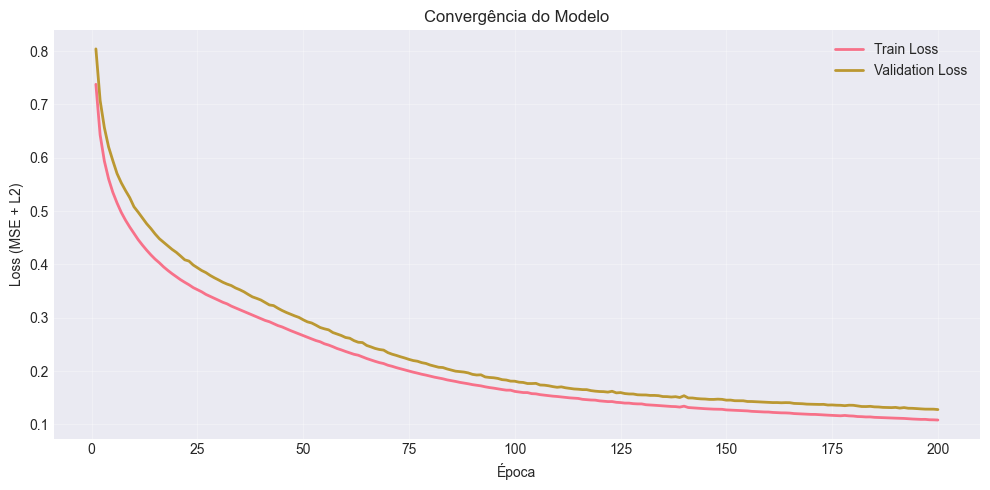

Épocas treinadas: 200
Loss final - Train: 0.1083 | Val: 0.1279


In [12]:
# Plot curvas de loss
plt.figure(figsize=(10, 5))
epochs = range(1, len(model.train_losses) + 1)

plt.plot(epochs, model.train_losses, label='Train Loss', linewidth=2)
plt.plot(epochs, model.val_losses, label='Validation Loss', linewidth=2)
plt.xlabel('Época')
plt.ylabel('Loss (MSE + L2)')
plt.title('Convergência do Modelo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Épocas treinadas: {len(model.train_losses)}")
print(f"Loss final - Train: {model.train_losses[-1]:.4f} | Val: {model.val_losses[-1]:.4f}")

## 8. Métricas de Avaliação

Métricas obrigatórias para regressão: MAE, MAPE, MSE, RMSE, R²

In [13]:
# Função para calcular métricas
def calc_metrics(y_true, y_pred):
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    mae = np.mean(np.abs(y_true - y_pred))
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)

    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - y_true.mean()) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    # MAPE (evitar divisão por zero)
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

# Fazer predições e desnormalizar
y_pred_test_norm = model.predict(X_test)
y_pred_test = y_pred_test_norm * y_std + y_mean
y_true_test = y_test * y_std + y_mean

y_pred_train_norm = model.predict(X_train)
y_pred_train = y_pred_train_norm * y_std + y_mean
y_true_train = y_train * y_std + y_mean

# Calcular métricas
train_metrics = calc_metrics(y_true_train, y_pred_train)
test_metrics = calc_metrics(y_true_test, y_pred_test)

# Baseline (preditor de média)
baseline_pred = np.full_like(y_true_test, y_true_train.mean())
baseline_metrics = calc_metrics(y_true_test, baseline_pred)

# Exibir resultados
print("MÉTRICAS DE AVALIAÇÃO")
print("="*70)
print(f"{'Métrica':<10} {'Train':<15} {'Test':<15} {'Baseline':<15}")
print("-"*70)
print(f"{'MAE':<10} {train_metrics['MAE']:<15.2f} {test_metrics['MAE']:<15.2f} {baseline_metrics['MAE']:<15.2f}")
print(f"{'MSE':<10} {train_metrics['MSE']:<15.2f} {test_metrics['MSE']:<15.2f} {baseline_metrics['MSE']:<15.2f}")
print(f"{'RMSE':<10} {train_metrics['RMSE']:<15.2f} {test_metrics['RMSE']:<15.2f} {baseline_metrics['RMSE']:<15.2f}")
print(f"{'R²':<10} {train_metrics['R2']:<15.4f} {test_metrics['R2']:<15.4f} {baseline_metrics['R2']:<15.4f}")
print(f"{'MAPE (%)':<10} {train_metrics['MAPE']:<15.2f} {test_metrics['MAPE']:<15.2f} {baseline_metrics['MAPE']:<15.2f}")
print("="*70)

melhoria = ((baseline_metrics['RMSE'] - test_metrics['RMSE']) / baseline_metrics['RMSE'] * 100)
print(f"\nMelhoria sobre baseline: {melhoria:.1f}%")

MÉTRICAS DE AVALIAÇÃO
Métrica    Train           Test            Baseline       
----------------------------------------------------------------------
MAE        42.95           44.83           143.29         
MSE        3562.55         4024.64         33800.49       
RMSE       59.69           63.44           183.85         
R²         0.8894          0.8809          -0.0000        
MAPE (%)   103.73          101.15          796.90         

Melhoria sobre baseline: 65.5%


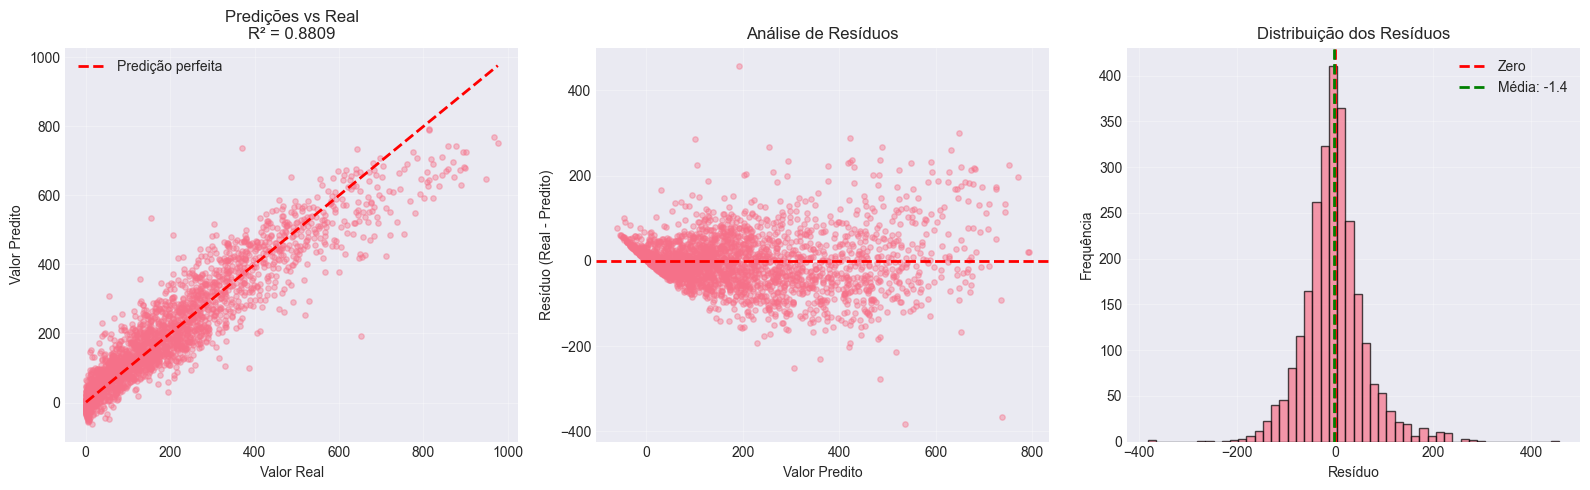

Estatísticas dos resíduos:
  Média: -1.37 (ideal: ~0)
  Std: 63.43
  Mediana do erro absoluto: 31.89


In [14]:
# Visualizações de avaliação
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Predito vs Real
axes[0].scatter(y_true_test, y_pred_test, alpha=0.4, s=15)
lim = [y_true_test.min(), y_true_test.max()]
axes[0].plot(lim, lim, 'r--', linewidth=2, label='Predição perfeita')
axes[0].set_xlabel('Valor Real')
axes[0].set_ylabel('Valor Predito')
axes[0].set_title(f'Predições vs Real\nR² = {test_metrics["R2"]:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Resíduos
residuals = (y_true_test - y_pred_test).flatten()
axes[1].scatter(y_pred_test, residuals, alpha=0.4, s=15)
axes[1].axhline(0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Valor Predito')
axes[1].set_ylabel('Resíduo (Real - Predito)')
axes[1].set_title('Análise de Resíduos')
axes[1].grid(True, alpha=0.3)

# Distribuição dos resíduos
axes[2].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[2].axvline(0, color='r', linestyle='--', linewidth=2, label='Zero')
axes[2].axvline(residuals.mean(), color='g', linestyle='--', linewidth=2, label=f'Média: {residuals.mean():.1f}')
axes[2].set_xlabel('Resíduo')
axes[2].set_ylabel('Frequência')
axes[2].set_title('Distribuição dos Resíduos')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Estatísticas dos resíduos:")
print(f"  Média: {residuals.mean():.2f} (ideal: ~0)")
print(f"  Std: {residuals.std():.2f}")
print(f"  Mediana do erro absoluto: {np.median(np.abs(residuals)):.2f}")

## 9. Conclusão

### Resultados:
- **R² = {:.4f}**: Modelo explica ~{:.1f}% da variância
- **RMSE = {:.2f}**: Erro médio de ~{:.0f} aluguéis
- **Melhoria sobre baseline**: {:.1f}%

### Limitações:
- MLP não captura dependências temporais de longo prazo
- Features podem ser expandidas (lags, interações)
- Hiperparâmetros não foram otimizados sistematicamente

### Melhorias Futuras:
- Arquiteturas recorrentes (LSTM/GRU) para séries temporais
- Feature engineering mais sofisticado
- Ensemble com outros modelos (XGBoost, Random Forest)
- Grid search para otimização de hiperparâmetros

### Ferramentas de IA:
Claude Code (Anthropic) foi usado para auxiliar na estruturação do código. Todo o código foi compreendido e validado manualmente.

### Referências:
- Dataset: Fanaee-T & Gama (2013), UCI ML Repository
- Implementação: NumPy, conceitos de Goodfellow et al. (Deep Learning, 2016)
- Material do curso: https://insper.github.io/ann-dl/